# ASSIGNED methyl isonitrile kinetics

**This is an exam. You have to work alone on this problem. You are free to consult the book, your notes, the lecture notes, your homeworks and the posted solutions.**
![img](//s-media-cache-ak0.pinimg.com/236x/d3/64/0c/d3640cd5163301a557f36b4027c70ce0.jpg)
The conversion of methyl isonitrile ($CH_{3}NC$) to acetonitrile ($CH_{3}CN$) is a first order reaction:
$CH_{3}NC \rightarrow CH_{3}CN$
A table of data monitoring the partial pressure of $CH_{3}NC$ as it reacts to form $CH_{3}CN$ in a batch reactor is given below. U
Provided data:

<table id="org55095ba" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">Time (min)</th>
<th scope="col" class="org-right">Pressure CH3NC (torr)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-right">0</td>
<td class="org-right">150</td>
</tr>


<tr>
<td class="org-right">20</td>
<td class="org-right">140</td>
</tr>


<tr>
<td class="org-right">42</td>
<td class="org-right">130</td>
</tr>


<tr>
<td class="org-right">83</td>
<td class="org-right">115</td>
</tr>


<tr>
<td class="org-right">167</td>
<td class="org-right">88</td>
</tr>


<tr>
<td class="org-right">250</td>
<td class="org-right">68</td>
</tr>


<tr>
<td class="org-right">333</td>
<td class="org-right">52</td>
</tr>


<tr>
<td class="org-right">500</td>
<td class="org-right">31</td>
</tr>
</tbody>
</table>

Additional information:

-   T = 298 K
-   R = 62.36367  L\*Torr/mol/K

Using this information,
Determine the rate constant, its 95% confidence limits and its units.

In [1]:
import numpy as np

t = np.array([0, 20, 42, 83, 167, 250, 333, 500])
P = np.array([150, 140, 130, 115, 88, 68, 52, 31])

R = 62.36367
T = 298  # K

Show graphically that your calculated rate constant describes the data.

Demonstrate that the rate constant you calculated minimizes the error between the fit and the data.

# Solution

We assume this is in a batch reactor. The mole balance on a constant volume batch reactor is:
$\frac{dCa}{dt} = k Ca$
with the solution:
$Ca / Ca0 = exp(-k t)$
We can take the pressure data, and convert it to concentration, and then fit it directly to the data using this model. We use nlinfit here, but you could also linearize and use regress.
After we fit the data, we can calculate the summed squared error for different values of the parameter and show that the summed squared error is a minimum at the fit.

The rate constant is [ 0.00318302] 1/min.
 The confidence interval is [[ 0.00314218  0.00322387]].

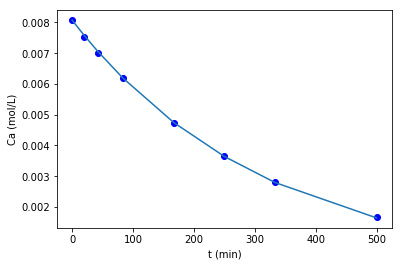

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycse import regress, nlinfit

# calculate concentration
C = P / (R * T)

def model(t, k):
    'C/C0 = exp(-k t)'
    return np.exp(-k * t)

# fit the data
p, pint, se = nlinfit(model, t, C/C[0], 0.1)
print('The rate constant is {} 1/min.\n '
      'The confidence interval is {}.\n '.format(p, pint))

plt.plot(t, C, 'bo')
plt.plot(t, C[0] * model(t, p))
plt.xlabel('t (min)')
plt.ylabel('Ca (mol/L)')

Here we show the $k$ value minimizes the fit error. We define the fit error as the sum of the errors between what the fit predicts and the data.

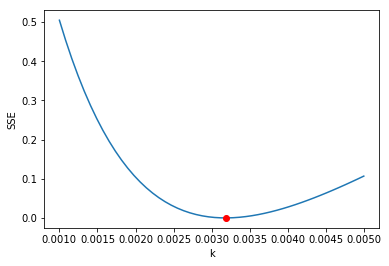

In [1]:
# Show this minimizes the error
prange = np.linspace(0.001, 0.005)

SSE = [np.sum((model(t, p1) - C / C[0])**2) for p1 in prange]
plt.figure()
plt.plot(prange, SSE)
# plot the value we fitted, and the SSE at that point
plt.plot([p], np.sum((model(t, p) - C/C[0])**2), 'ro')
plt.xlabel('k')
plt.ylabel('SSE')

This figure shows that the summed squared error is a minimum at the value we found by fitting. Many of you calculated an R<sup>2</sup> value and found it was close to 1. That doesn't demonstrate the fitted value is a minimum, because you could ask how do you know another k might not get closer to one?